<a href="https://colab.research.google.com/github/GENTLEW1ND/Python/blob/main/Gym_Calorie_predicting_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install kaggle

In [36]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [37]:
# Kaggle api
!kaggle datasets download valakhorasani/gym-members-exercise-dataset

Dataset URL: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset
License(s): apache-2.0
gym-members-exercise-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [38]:
!ls

gym-members-exercise-dataset.zip  gym_members_exercise_tracking.csv  kaggle.json  sample_data


In [39]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/gym-members-exercise-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [40]:
!ls

gym-members-exercise-dataset.zip  gym_members_exercise_tracking.csv  kaggle.json  sample_data


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Loading the csv file to a pandas dataframe
gym_data = pd.read_csv('/content/gym_members_exercise_tracking.csv')

In [43]:
gym_data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [44]:
gym_data.shape

(973, 15)

In [45]:
# Finding some information about the data
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [46]:
# Finding the statistical measures
gym_data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [47]:
gym_data['Gender'].value_counts()

,count
Gender,
Male,511
Female,462


In [48]:
gym_data_updated = gym_data.drop(columns=['Workout_Type'], axis=1)

In [49]:
gym_data_updated.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39


In [50]:
gym_data_updated.shape

(973, 14)

In [51]:
gym_data_updated.groupby("Gender").mean()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Gender,,,,,,,,,,,,,
Female,38.335498,60.939827,1.644242,179.759740,143.621212,62.114719,1.260823,862.248918,27.656710,2.205411,3.339827,1.807359,22.727835
Male,38.998043,85.531115,1.793405,179.996086,143.898239,62.320939,1.252446,944.455969,22.553816,3.007436,3.305284,1.812133,26.886967


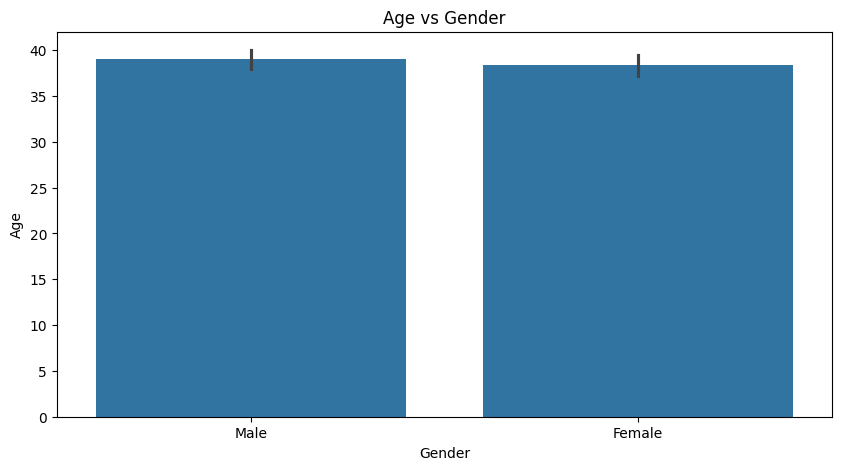

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x='Gender',y='Age',data=gym_data_updated)
plt.title('Age vs Gender')
plt.show()

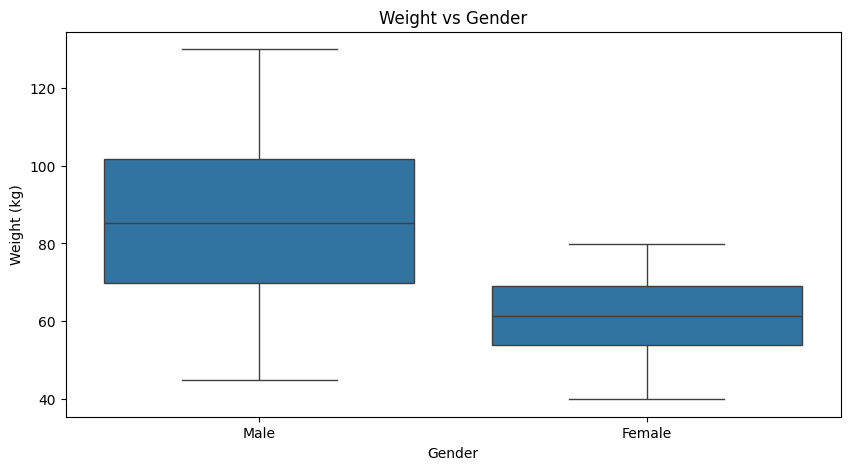

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Gender',y='Weight (kg)',data=gym_data_updated)
plt.title('Weight vs Gender')
plt.show()

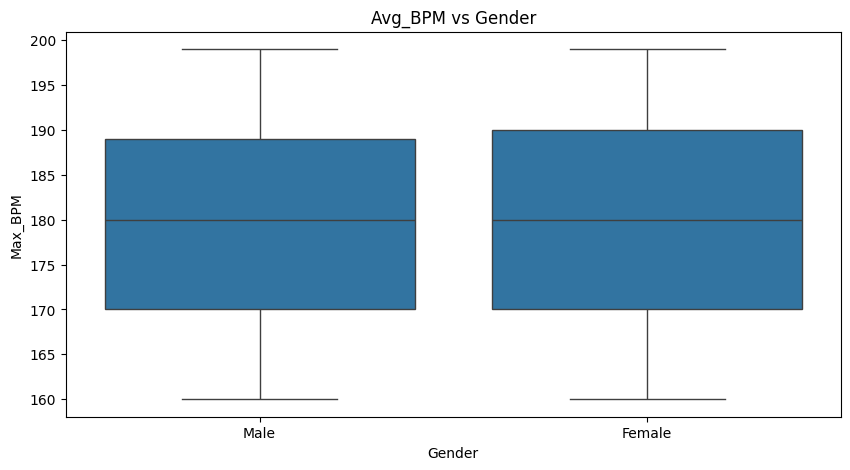

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Gender',y='Max_BPM',data=gym_data_updated)
plt.title('Avg_BPM vs Gender')
plt.show()

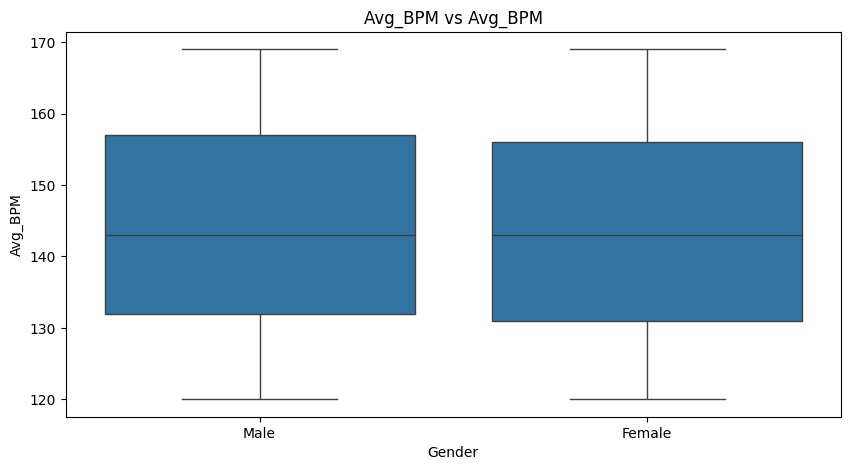

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Gender',y='Avg_BPM',data=gym_data_updated)
plt.title('Avg_BPM vs Avg_BPM')
plt.show()

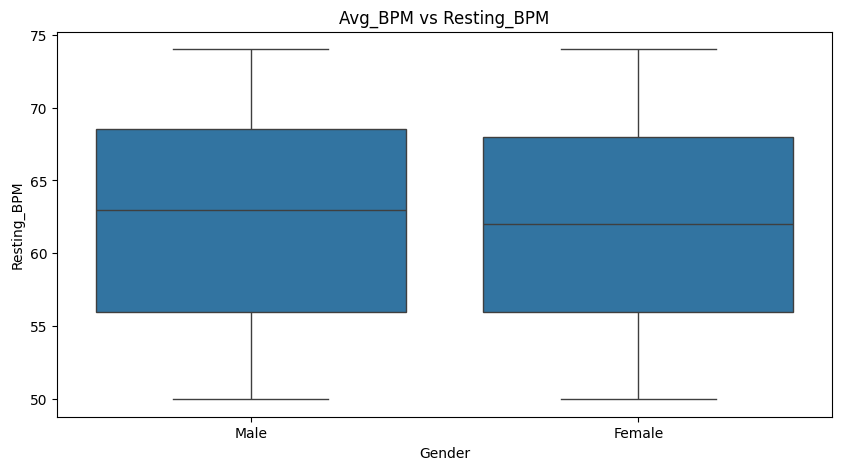

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Gender',y='Resting_BPM',data=gym_data_updated)
plt.title('Avg_BPM vs Resting_BPM')
plt.show()

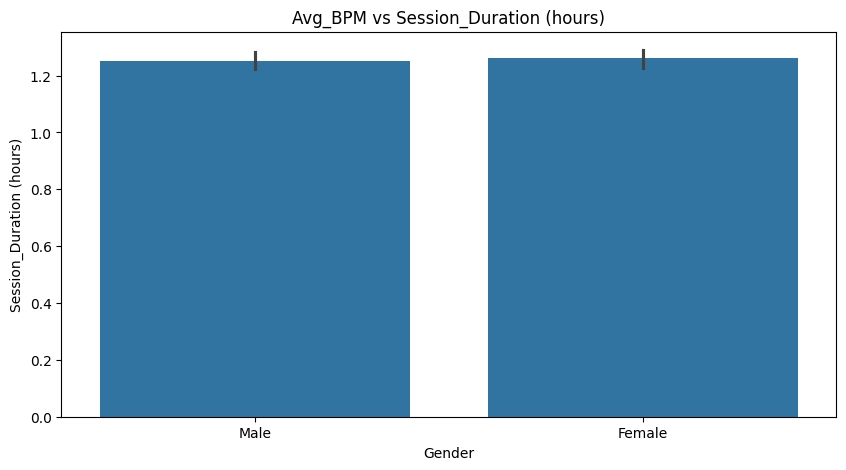

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x='Gender',y='Session_Duration (hours)',data=gym_data_updated)
plt.title('Avg_BPM vs Session_Duration (hours)')
plt.show()

In [58]:
# Encoding the Gender
gym_data_updated.replace({'Gender': {'Male': 1, 'Female': 0}}, inplace=True)

<ipython-input-58-941f0d561799>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gym_data_updated.replace({'Gender': {'Male': 1, 'Female': 0}}, inplace=True)


In [59]:
gym_data_updated.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39


In [60]:
# Dropping the not needed Columns
gym_data_updated.drop(columns=['Water_Intake (liters)','Experience_Level'], inplace=True)

In [61]:
gym_data_updated.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,12.6,4,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,33.9,4,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,33.4,4,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,28.8,3,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,29.2,3,14.39


In [64]:
from sklearn.preprocessing import StandardScaler

# Standardize specified columns
scaler = StandardScaler()
columns_to_scale = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Workout_Frequency (days/week)', 'BMI']
gym_data_updated[columns_to_scale] = scaler.fit_transform(gym_data_updated[columns_to_scale])

gym_data_updated.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),BMI
0,1.422343,1,0.681493,-0.098545,0.010081,0.922970,60,1.264598,1.495690,-1.978321,0.743295,0.794278
1,0.600965,0,0.049316,-1.508604,-0.076726,0.504494,66,0.127098,-0.082284,1.426301,0.743295,1.064652
2,-0.548964,0,-0.271491,-0.490228,-1.118414,-1.518142,54,-0.427068,-0.838243,1.346380,0.743295,-0.030361
3,-1.123928,1,-0.974433,-0.176881,0.878155,1.411193,56,-1.943735,-1.370351,0.611110,-0.352502,-0.976669
4,-0.056137,1,-1.309393,0.528148,0.704540,0.992716,68,-1.797902,-1.282278,0.675047,-0.352502,-1.580503


In [65]:
# Splitting the features and the target
X = gym_data_updated.drop(columns=['Calories_Burned'])
Y = gym_data_updated['Calories_Burned']

In [67]:
print(X.head())

        Age  Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0  1.422343       1     0.681493   -0.098545  0.010081  0.922970           60   
1  0.600965       0     0.049316   -1.508604 -0.076726  0.504494           66   
2 -0.548964       0    -0.271491   -0.490228 -1.118414 -1.518142           54   
3 -1.123928       1    -0.974433   -0.176881  0.878155  1.411193           56   
4 -0.056137       1    -1.309393    0.528148  0.704540  0.992716           68   

   Session_Duration (hours)  Fat_Percentage  Workout_Frequency (days/week)  \
0                  1.264598       -1.978321                       0.743295   
1                  0.127098        1.426301                       0.743295   
2                 -0.427068        1.346380                       0.743295   
3                 -1.943735        0.611110                      -0.352502   
4                 -1.797902        0.675047                      -0.352502   

        BMI  
0  0.794278  
1  1.064652  
2 

In [68]:
print(Y.head())

0    1.495690
1   -0.082284
2   -0.838243
3   -1.370351
4   -1.282278
Name: Calories_Burned, dtype: float64


In [69]:
from sklearn.model_selection import train_test_split

# Splitting the data into training data and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

print(X.shape,X_train.shape,X_test.shape)

(973, 11) (778, 11) (195, 11)


In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

# Model Evaluation for training data
prediction = model.predict(X_train)

mae = mean_squared_error(prediction,Y_train)
print('Mae : ',mae)

r2 = r2_score(prediction,Y_train)
print('R2 : ',r2)

Mae :  0.021378156439991754
R2 :  0.978500749221524


In [74]:
# Model Evaluation for testing data
prediction = model.predict(X_test)

mae = mean_squared_error(prediction,Y_test)
print('Mae : ',mae)

r2 = r2_score(prediction,Y_test)
print('R2 : ',r2)

Mae :  0.01854980952062052
R2 :  0.9800144328507729
